<h3> Content</h3>
<hr>
1. <a id = 'step'>Steps for Calculation Dykstra-Parsons permeability variation</a><br>
2. <a id = 'random'>Create Random Data Set</a><br>
3. <a id = 'random_v'>Calculate Dykstra-Parsons permeability variation for random Data Set</a><br>
4. <a id = 'book'>Tarek Ahmed Book Example</a><br>
5. <a id='Result'>Result</a>
<hr>

<div class='alert alert block alert-success'> <h4 id ='step'> Step for Calculating Dykstra-Parsons permeability variation :</h4> 

 1. Arrange the entire permeability data in a descending order and calculate % of thickness with greater permeability
 2. Using a log-probability graph paper, plot permeability values on the log scale and the % of thickness on the  probability scale.
 3. Draw the best straight line through the points.
 4. Read the corresponding permeability values at 84.1% and 50% of thickness. These two values are designated as k84.1 and k50.
 5. The Dykstra-Parsons permeability variation is defined by the following expression:
 $$ V = \displaystyle\frac{(k_{50} - K_{84.1})}{(k_{50}) }$$
    
</div>

<h3 id='random'>Create Random Data Set</h3>

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
np.random.seed(0)
k = np.random.randint(20, 2000,100)
k.sort()
k = k[::-1]
h = np.random.randint(1, 20,100)

In [3]:
def shift_elements(arr, num, fill_value):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    return result

In [4]:
h

array([ 5,  7,  5, 16,  4, 13,  5,  9, 15, 16,  4, 16, 14, 17, 18,  6, 10,
        4,  1,  6,  1, 18, 19,  5,  3, 17,  4,  3, 11, 14, 17,  8, 10,  1,
       11, 19, 12,  3,  3,  4,  4, 19, 15,  4, 18, 19, 15, 10,  2,  5, 11,
       12,  9, 12,  3, 17,  1,  1,  7, 15, 11,  9, 14,  3,  4,  3, 12, 14,
       17,  9,  9,  9,  3,  4, 13, 15,  1,  5,  4, 14, 12, 14, 14, 12, 17,
       15, 17,  2,  9,  1,  5,  7, 14,  8, 16, 10, 19,  9, 16, 12])

In [5]:
k

array([1982, 1981, 1976, 1960, 1945, 1940, 1914, 1891, 1848, 1798, 1767,
       1753, 1751, 1721, 1673, 1661, 1644, 1609, 1594, 1532, 1530, 1516,
       1503, 1486, 1475, 1440, 1403, 1365, 1332, 1309, 1236, 1227, 1221,
       1191, 1163, 1126, 1114, 1097, 1086, 1053,  996,  930,  928,  908,
        902,  870,  869,  865,  855,  822,  817,  799,  797,  783,  776,
        775,  775,  734,  725,  717,  704,  695,  679,  659,  653,  631,
        620,  619,  579,  571,  564,  563,  563,  557,  530,  468,  450,
        443,  418,  408,  355,  334,  311,  297,  293,  277,  264,  223,
        194,  171,  148,  148,  135,  119,  111,  107,  104,   92,   77,
         48])

In [6]:
np.sum(h)

975

In [7]:
cumulative_sum_of_h =np.cumsum(h)
h_with_greater_k = shift_elements(cumulative_sum_of_h, 1, 0)
h_with_greater_k_in_percentage = (h_with_greater_k/np.sum(h))*100

In [8]:
df = pd.DataFrame({'K':k, "H":h,'h with greater k':h_with_greater_k, '% of h with greater k':h_with_greater_k_in_percentage})

In [9]:
df

,K,H,h with greater k,% of h with greater k
0,1982,5,0,0.000000
1,1981,7,5,0.512821
2,1976,5,12,1.230769
3,1960,16,17,1.743590
4,1945,4,33,3.384615
...,...,...,...,...
95,107,10,909,93.230769
96,104,19,919,94.256410
97,92,9,938,96.205128
98,77,16,947,97.128205


In [10]:
# df.to_csv('Dykstra_parsons permeability variation.csv')

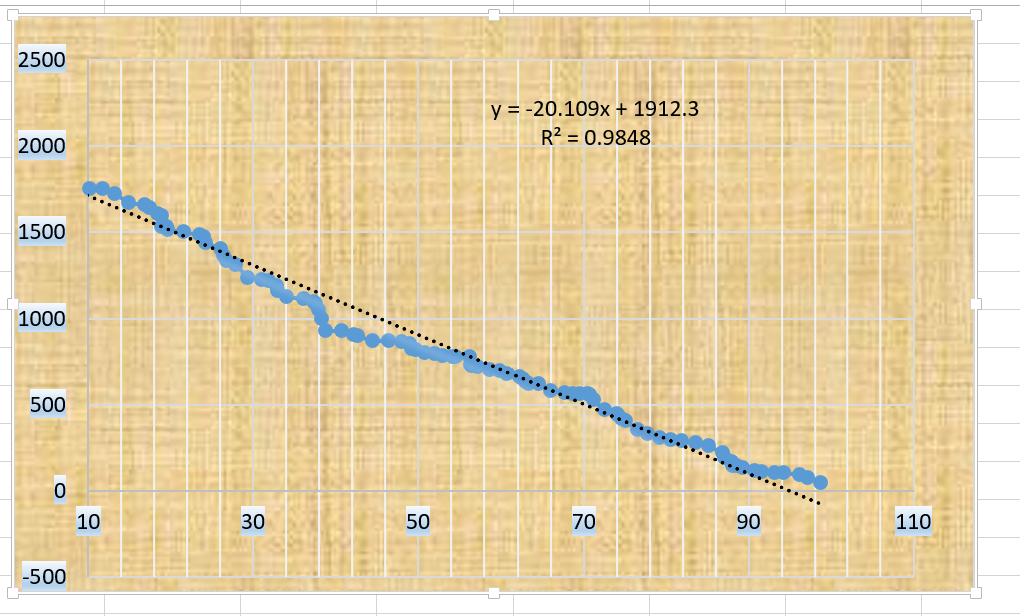

In [11]:
m = -20.109
c = 1912.3
y1 = m*10 +c
y2 = m*90 + c
y1,y2

(1711.21, 102.48999999999978)

<h3 id = 'random_v'>Calculate Dykstra-Parsons permeability variation for random Data Set</h3>

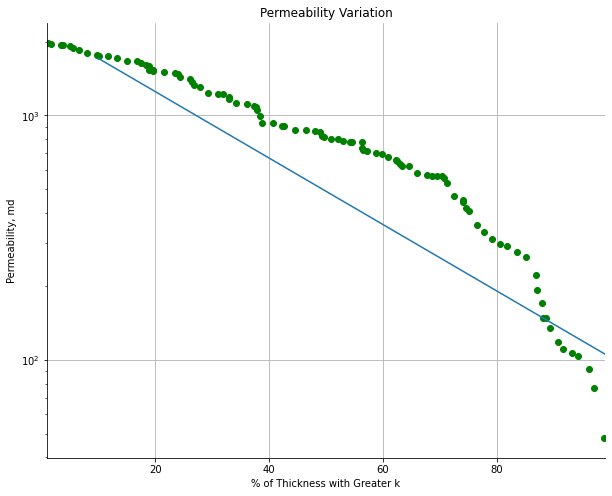

In [12]:
fig,ax= plt.subplots(figsize = (10, 8))
ax.set_xlim(1, 99)
X = df['% of h with greater k'].values
Y = df['K'].values

ax.set_yscale('log')
sns.despine(fig=fig)
plt.plot(X, Y, 'go')
plt.title('Permeability Variation')
plt.ylabel('Permeability, md')
plt.xlabel('% of Thickness with Greater k')
# sns.regplot(x= X,y = Y)
plt.plot([10,100], [y1, y2])
plt.grid(True)

In [13]:
v = ((m*50 +c) -(m*84.1 +c))/(m*50 +c)
print(f'Dykstra-Parsons permeability variation {np.round(v*100, 2)} % ')

Dykstra-Parsons permeability variation 75.62 % 


D:\work\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


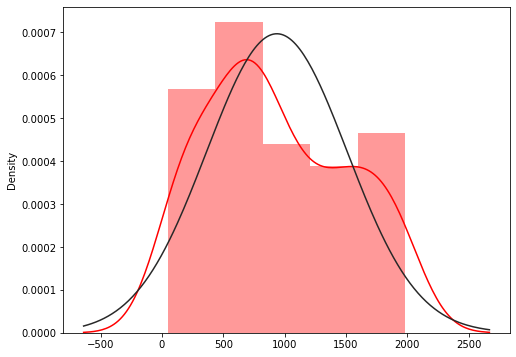

In [14]:
df = pd.DataFrame(Y)
plt.figure(figsize = (8, 6))
sns.distplot(df, fit = norm, color = 'r')
plt.show()

<div class='alert alert block alert-info'> <h3 id='book'>$ ** {Tarek Ahmed Book Example}** $</h3> </div>

<P><strong> Q. The following conventional core analysis data are available from three wells:</strong></P>  
<hr>
<center><strong>well 1</strong></center>

         
  |   Depth , ft   |      k, md     | phi , % |  
   |------------|------------|---------|
       |5389–5391 |166  |17.4|
       |–5393| 435| 18.0|
       |–5395 |147 |16.7|
       |–5397 |196 |17.4|
       |–5399| 254| 19.2 |
       |–5401 |105 |16.8|
       |–5403 |158| 16.8| 
       |–5405| 153 |15.9|
       |–5406| 128 |17.6|
       |–5409 |172 |17.2|

   
   <hr>
   <center><strong>well 2</strong></center>
   
 
   
 |   Depth    |      k     | phi , % |
   |------------|------------|---------|
   |5397–5398.5| 72 |15.7 |
| –539.95| 100 |15.6| 
 |–5402| 49| 15.2| 
 |–5404.5| 90| 15.4 |
|–5407 |91 |16.1| 
 –5409| 44 |14.1 |
|–5411| 62 |15.6 |
 |–5413 |49| 14.9 |
 |–5415 |49| 14.8 |
| –5417 |83| 15.2|

   <hr>
   <center><strong>well 3</strong></center>

   
   |   Depth    |      k     | phi , % |
   |------------|------------|---------|
        |5401–5403| 28 |14.0|
        |–5405 |40 |13.7|
        |–5407 |20 |12.2|
        |–5409 |32| 13.6|
        |–5411 |35 |14.2|
       | –5413 |27 |12.6|
       | –5415| 27 |12.3|
       | –5417| 9 |10.6|
       | –5419| 30| 14.1|
       
<P><strong> Calculate the Dykstra-Parsons permeability variation.?</strong></P>       
       

<div class='alert alert block alert-success'> <h4 id ='step'> Step :</h4> 

 1. Arrange the entire permeability data in a descending order and calculate % of thickness with greater permeability
 2. Using a log-probability graph paper, plot permeability values on the log scale and the % of thickness on the  probability scale.
 3. Draw the best straight line through the points.
 4. Read the corresponding permeability values at 84.1% and 50% of thickness. These two values are designated as k84.1 and k50.
 5. The Dykstra-Parsons permeability variation is defined by the following expression:
 $$ V = \displaystyle\frac{(k_{50} - K_{84.1})}{(k_{50}) }$$
    
</div>

In [15]:
perm = np.array([435 ,254 ,196 ,172 ,166 ,158 ,153 ,147 ,128,105 ,100 ,91,90 ,83 ,72 ,62 ,49 ,44 ,40 ,35 ,32 ,30 ,28 ,27 ,20 ,9])
thickness = np.array([2,2,2,3,2,2,2,2,1,2,1,2.5,2.5,2,1.5,2, 6.5,2,2,2,2,2,2,2,2,2])

perm.shape, thickness.shape

((26,), (26,))

In [16]:
cumulative_sum_of_thickness =np.cumsum(thickness)
thickness_with_greater_k = shift_elements(cumulative_sum_of_thickness, 1, 0)
thickness_with_greater_k_in_percentage = np.round((thickness_with_greater_k/np.sum(thickness))*100, 3)

In [17]:
thickness_with_greater_k_in_percentage

array([ 0.   ,  3.571,  7.143, 10.714, 16.071, 19.643, 23.214, 26.786,
       30.357, 32.143, 35.714, 37.5  , 41.964, 46.429, 50.   , 52.679,
       56.25 , 67.857, 71.429, 75.   , 78.571, 82.143, 85.714, 89.286,
       92.857, 96.429])

In [18]:
data = pd.DataFrame({'permeability':perm, "thickness":thickness,'thickness with greater k':thickness_with_greater_k, 
                   '% of thickness with greater k':thickness_with_greater_k_in_percentage})
data

,permeability,thickness,thickness with greater k,% of thickness with greater k
0,435,2.0,0.0,0.000
1,254,2.0,2.0,3.571
2,196,2.0,4.0,7.143
3,172,3.0,6.0,10.714
4,166,2.0,9.0,16.071
5,158,2.0,11.0,19.643
6,153,2.0,13.0,23.214
7,147,2.0,15.0,26.786
8,128,1.0,17.0,30.357
9,105,2.0,18.0,32.143


In [19]:
#data.to_csv('Dykstra_parsons permeability variation example.csv')

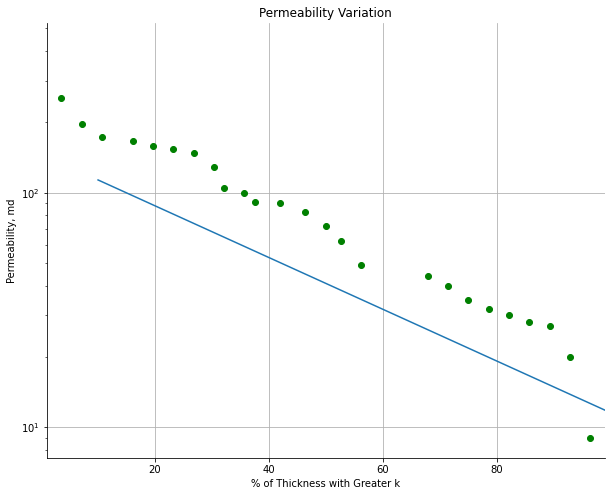

In [20]:
fig,ax= plt.subplots(figsize = (10, 8))
ax.set_xlim(1, 99)
ax.set_yscale('log')
X = data['% of thickness with greater k'].values
Y = data['permeability'].values


sns.despine(fig=fig)
plt.plot(X, Y, 'go')
plt.title('Permeability Variation')
plt.ylabel('Permeability, md')
plt.xlabel('% of Thickness with Greater k')
# sns.regplot(x= X,y = Y)
plt.plot([10, 100], [113.16,11.54])
plt.grid(True)

In [21]:
m =(113.16 - 11.54)/(10-100)
c = 11.54 - m*100
c

124.45111111111112

In [22]:
k_50 = np.round((m*50 +c), 2) 
k_84 = np.round((m*84.1 +c), 2)
print(f'permeability values at 84.1% thickness is {k_84} and permeability values at 50% of thickness is {k_50} ')

permeability values at 84.1% thickness is 29.49 and permeability values at 50% of thickness is 68.0 


> By drawing straight line ,we get <div class='alert alert block alert-success'>
$k_{50}$  = 68 md  and 
$k_{50}$  = 29.49 md
</div>

*** 
<h3>Dykstra-Parsons permeability variation</h3>
<br>
<div class='alert alert block alert-success'>
 $$ V = \displaystyle\frac{(k_{50} - K_{84.1})}{(k_{50}) }$$
 </div>
 
***

In [23]:
k_50 = 68
k_84 = 29.49
V = (k_50-k_84)/(k_50)
print(f'Dykstra-Parsons permeability variation {np.round(V*100, 2)} % ')

Dykstra-Parsons permeability variation 56.63 % 


<h3 id = 'Result'>Result</h3>

<div class='alert alert block alert-success'>
    <strong>Dykstra-Parsons permeability variation for Randam DataSet is 75.62 % </strong><br>
    <strong>Dykstra-Parsons permeability variation for tarek ahmed example is 56.63 %</strong>
 </div>

Text(0.5, 1.0, 'Comparision of Dykstra-Parsons permeability variation for randam and actual dataset ')

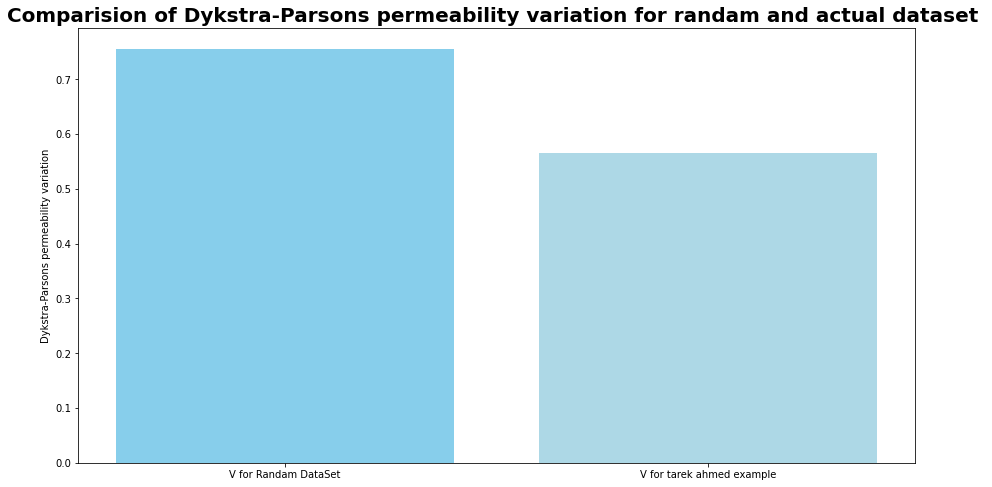

In [24]:
plot = {"V for Randam DataSet":v, "V for tarek ahmed example":V,}
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(plot.keys(), plot.values(), color=['skyblue', 'lightblue'])
ax.set_ylabel('Dykstra-Parsons permeability variation')

ax.set_title('Comparision of Dykstra-Parsons permeability variation for randam and actual dataset ', fontweight='bold',fontsize=20)